# NLP in Chinese
<br>
This repo contains the Natural Language Processing (NLP) in Chinese project as part of my data science portfolio. The objective of this project is to work with text in Chinese language, which involve segmenting, cleaning, and visualizing the most frequent words of a famous Chinese novel in a wordcloud image. 

1. [Problem Statement](#ps)
2. [Dataset](#data)
3. [Natural Language Processing](#nlp)
4. [Discussion and Conclusion](#conclusion)


---
# <a name="ps">Problem Statement</a>

### What is NLP?
Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human languages, in particular how to program computers to process and analyze large amounts of natural language data. The ultimate objective of NLP is to read, decipher, understand, and make sense of the human languages in a manner that is valuable. 

In this project, we will look at how to perform NLP for text written in Chinese language. We will make use of a Chinese text segmentation library called "Jieba". Jieba is arguably the most elegant and the most popular Chinese word segmentation tool in python. "结巴" 中文分词: 做最好的Python中文分词组件.

To install, you can use PIP:
```python
pip install jieba
```

---
# <a name="data">Dataset</a>

The dataset (text) used in this project is the "Journey to the West" novel. "Journey to the West" or <<西游记>> is a Chinese novel published in the 16th century during the Ming dynasty and attributed to Wu Cheng'en. It is one of the Four Great Classical Novels of Chinese literature. Arthur Waley's popular abridged translation, Monkey, is well known in English-speaking countries. [(Source)](https://en.wikipedia.org/wiki/Journey_to_the_West)

---
# <a name="nlp">Natural Language Processing</a>

In [1]:
# import libraries
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import jieba

In [2]:
# set stopword file
stopwords_path = "stopwords_cn_en.txt"

# set Chinese font to be used
font_path = "SourceHanSerifSC-Regular.otf"

In [3]:
# load text file (optional with encoding utf-8 and ignore errors)
text = open("西游记.txt").read()

# take a look at the text
text

'《西游记》\n《》目录 第一回\u3000灵根育孕源流出\u3000心性修持大道生\n    诗曰：\n    混沌未分天地乱，茫茫渺渺无人见。\n    自从盘古破鸿蒙，开辟从兹清浊辨。\n    覆载群生仰至仁，发明万物皆成善。\n    欲知造化会元功，须看西游释厄传。\n    盖闻天地之数，有十二万九千六百岁为一元。将一元分为十二会，乃子、丑、寅、卯、辰、巳、午、未、申、酉、戌、亥之十二支也。每会该一万八百岁。且就一日而论：子时得阳气，而丑则鸡鸣；寅不通光，而卯则日出；辰时食后，而巳则挨排；日午天中，而未则西蹉；申时晡而日落酉；戌黄昏而人定亥。譬于大数，若到戌会之终，则天地昏蒙而万物否矣。再去五千四百岁，交亥会之初，则当黑暗，而两间人物俱无矣，故曰混沌。又五千四百岁，亥会将终，贞下起元，近子之会，而复逐渐开明。邵康节曰：“冬至子之半，天心无改移。一阳初动处，万物未生时。”到此，天始有根。再五千四百岁，正当子会，轻清上腾，有日，有月，有星，有辰。日、月、星、辰，谓之四象。故曰，天开于子。又经五千四百岁，子会将终，近丑之会，而逐渐坚实。易曰：“大哉乾元！至哉坤元！万物资生，乃顺承天。”至此，地始凝结。再五千四百岁，正当丑会，重浊下凝，有水，有火，有山，有石，有土。水、火、山、石、土谓之五形。故曰，地辟于丑。又经五千四百岁，丑会终而寅会之初，发生万物。历曰：“天气下降，地气上升；天地交合，群物皆生。”至此，天清地爽，阴阳交合。再五千四百岁，正当寅会，生人，生兽，生禽，正谓天地人，三才定位。故曰，人生于寅。\n    感盘古开辟，三皇治世，五帝定伦，世界之间，遂分为四大部洲：曰东胜神洲，曰西牛贺洲，曰南赡部洲，曰北俱芦洲。这部书单表东胜神洲。海外有一国土，名曰傲来国。国近大海，海中有一座山，唤为花果山。此山乃十洲之祖脉，三岛之来龙，自开清浊而立，鸿蒙判后而成。真个好山！有词赋为证。赋曰：\n    势镇汪洋，威宁瑶海。势镇汪洋，潮涌银山鱼入穴；威宁瑶海，波翻雪浪蜃离渊。木火方隅高积上，东海之处耸崇巅。丹崖怪石，削壁奇峰。丹崖上，彩凤双鸣；削壁前，麒麟独卧。峰头时听锦鸡鸣，石窟每观龙出入。林中有寿鹿仙狐，树上有灵禽玄鹤。瑶草奇花不谢，青松翠柏长春。仙桃常结果，修竹每留云。一条涧壑藤萝密，四面原堤草色新。正是百川会处擎天柱，万劫无移大地根。那座山，正当顶上，有一块仙

In [4]:
# segment words via Jieba
jieba_word = jieba.cut(text, cut_all=False) # cut_all is false by default
seg_list = " ".join(jieba_word)

# take a look at the result
seg_list

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\LIMCHI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.954 seconds.
Prefix dict has been built succesfully.


'《 西游记 》 \n 《 》 目录   第一回 \u3000 灵根育孕 源流 出 \u3000 心性 修持 大道 生 \n         诗 曰 ： \n         混沌 未 分 天地 乱 ， 茫茫 渺渺 无人 见 。 \n         自从 盘古 破 鸿蒙 ， 开辟 从兹 清浊 辨 。 \n         覆载 群生 仰至仁 ， 发明 万物 皆 成善 。 \n         欲知 造化 会元功 ， 须 看 西游 释厄传 。 \n         盖闻 天地 之数 ， 有 十二万 九千 六 百岁 为 一元 。 将 一元 分为 十二 会 ， 乃子 、 丑 、 寅 、 卯 、 辰 、 巳 、 午 、 未 、 申 、 酉 、 戌 、 亥 之 十二支 也 。 每会 该 一万八 百岁 。 且 就 一日 而论 ： 子时 得 阳气 ， 而 丑 则 鸡鸣 ； 寅 不通 光 ， 而卯 则 日出 ； 辰时 食后 ， 而 巳 则 挨排 ； 日午 天中 ， 而 未 则 西 蹉 ； 申时 晡 而 日落 酉 ； 戌 黄昏 而人定 亥 。 譬于 大数 ， 若 到戌会 之终 ， 则 天地 昏蒙而 万物 否矣 。 再 去 五千四百岁 ， 交亥会 之 初 ， 则 当 黑暗 ， 而 两间 人物 俱 无 矣 ， 故曰 混沌 。 又 五千四百岁 ， 亥 会 将 终 ， 贞下起元 ， 近子 之会 ， 而复 逐渐 开明 。 邵康节 曰 ： “ 冬至 子之半 ， 天心 无 改移 。 一阳 初动处 ， 万物 未生 时 。 ” 到 此 ， 天始 有 根 。 再 五千四百岁 ， 正当 子 会 ， 轻清 上腾 ， 有 日 ， 有 月 ， 有星 ， 有辰 。 日 、 月 、 星 、 辰 ， 谓之 四象 。 故曰 ， 天开 于子 。 又 经 五千四百岁 ， 子会 将 终 ， 近丑 之会 ， 而 逐渐 坚实 。 易 曰 ： “ 大哉 乾元 ！ 至 哉 坤 元 ！ 万 物资 生 ， 乃 顺承 天 。 ” 至此 ， 地始 凝结 。 再 五千四百岁 ， 正当 丑会 ， 重浊 下 凝 ， 有水 ， 有火 ， 有山 ， 有石 ， 有土 。 水 、 火 、 山 、 石 、 土 谓之 五形 。 故曰 ， 地辟 于 丑 。 又 经 五千四百岁 ， 丑会 终而寅会 之 初 ， 发生 万物 。 历曰 ： “ 天气 下降 ， 地 

In [5]:
%%time
# create custom stopwords
custom_stop_list = []

# load standard stopword file and add with custom stopwords
with open(stopwords_path, encoding="utf-8") as f_stop:
    f_stop_text = f_stop.read()
    f_stop_seg_list = f_stop_text.splitlines()
    f_stop_seg_list = f_stop_seg_list + custom_stop_list

# remove stopwords (standard and custom), only keep word segments with more than one character
mywordlist = []
for myword in seg_list.split(" "):
    if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:  # only keep word segments with more than one character
        mywordlist.append(myword)

Wall time: 17.6 s


In [6]:
# join words list to become a string for wordcloud visualization
text_processed = " ".join(mywordlist)
text_processed

'西游记 目录 第一回 灵根育孕 源流 心性 修持 大道 混沌 天地 茫茫 渺渺 无人 盘古 鸿蒙 开辟 从兹 清浊 覆载 群生 仰至仁 发明 万物 成善 欲知 造化 会元功 西游 释厄传 盖闻 天地 之数 十二万 九千 百岁 一元 一元 分为 十二 乃子 十二支 每会 一万八 百岁 一日 子时 阳气 鸡鸣 不通 而卯 日出 辰时 食后 挨排 日午 天中 申时 日落 黄昏 而人定 譬于 大数 到戌会 之终 天地 昏蒙而 万物 否矣 五千四百岁 交亥会 黑暗 两间 人物 故曰 混沌 五千四百岁 贞下起元 近子 之会 而复 开明 邵康节 冬至 子之半 天心 改移 一阳 初动处 万物 未生 天始 五千四百岁 正当 轻清 上腾 有星 有辰 谓之 四象 故曰 天开 于子 五千四百岁 子会 近丑 之会 坚实 大哉 乾元 物资 顺承 至此 地始 凝结 五千四百岁 正当 丑会 重浊 有水 有火 有山 有石 有土 谓之 五形 故曰 地辟 五千四百岁 丑会 终而寅会 发生 万物 历曰 天气 下降 天地 交合 群物皆生 至此 天清 地爽 阴阳 交合 五千四百岁 正当 寅会 生人 生兽 生禽 正谓 天地人 三才 定位 故曰 生于 盘古 开辟 三皇 治世 五帝 定伦 世界 之间 分为 四大部 东胜 神洲 牛贺洲 部洲 芦洲 这部 书单 东胜 神洲 海外 国土 名曰 傲来国 国近 大海 海中 一座 唤为 花果山 此山 乃十洲 祖脉 三岛 之来 自开 清浊 而立 鸿蒙 判后 而成 真个 好山 词赋 为证 势镇 汪洋 威宁 瑶海 势镇 汪洋 潮涌 银山 鱼入 威宁 瑶海 波翻 雪浪蜃离渊 木火方隅 高积 东海 之处 耸崇巅 丹崖 怪石 削壁 奇峰 丹崖 彩凤 双鸣 削壁 麒麟 独卧 峰头 鸡鸣 石窟 每观龙 出入 林中 有寿鹿 仙狐 树上 灵禽 玄鹤 瑶草奇花 不谢 青松 翠柏 长春 仙桃 修竹 留云 一条 藤萝 四面 原堤 草色 百川 会处 擎天柱 万劫 无移 大地 那座 正当 顶上 一块 仙石 其石 三丈 六尺 五寸 二丈 四尺 围圆 三丈 六尺 五寸 周天 三百六十五 二丈 四尺 围圆 按政历 二十四 九窍 八孔 九宫 八卦 四面 树木 遮阴 芝兰 相衬 盖自 开辟 每受 天真 地秀 日精 月华 感之 既久 灵通 之意 内育 仙胞 一日 迸裂 产一石 圆球 样大 因见 化作 石猴 五官 俱备

In [7]:
# count the top 100 most frequent words
print(Counter(mywordlist).most_common(100))

[('行者', 4078), ('八戒', 1677), ('师父', 1604), ('三藏', 1324), ('大圣', 889), ('唐僧', 802), ('菩萨', 730), ('沙僧', 721), ('不知', 657), ('和尚', 644), ('妖精', 631), ('两个', 594), ('长老', 512), ('只见', 485), ('国王', 456), ('徒弟', 439), ('呆子', 431), ('老孙', 408), ('大王', 379), ('悟空', 379), ('闻言', 371), ('那怪', 340), ('一声', 307), ('真个', 295), ('小妖', 285), ('今日', 281), ('兄弟', 269), ('宝贝', 266), ('却说', 262), ('取经', 262), ('三个', 258), ('不见', 239), ('孙行者', 235), ('铁棒', 231), ('认得', 223), ('妖怪', 215), ('师徒', 214), ('老者', 212), ('上前', 210), ('性命', 203), ('孙大圣', 201), ('如来', 201), ('太子', 191), ('妖魔', 187), ('乃是', 184), ('弟子', 184), ('西天', 184), ('哥哥', 182), ('问道', 176), ('老爷', 175), ('龙王', 175), ('土地', 174), ('观看', 173), ('师兄', 171), ('一齐', 170), ('贫僧', 170), ('行李', 169), ('陛下', 168), ('一个个', 167), ('一座', 163), ('怎生', 162), ('云头', 160), ('兵器', 158), ('天王', 158), ('公主', 158), ('几个', 156), ('模样', 156), ('心中', 155), ('袈裟', 155), ('爷爷', 154), ('不好', 150), ('一条', 148), ('怪物', 147), ('只得', 146), ('门外', 143), ('不题', 142), ('变化

In [8]:
%%time
# generate wordcloud
wc = WordCloud(font_path=font_path, background_color="white", 
               max_words=2000, max_font_size=100, 
               random_state=0, width=1000, height=860, margin=5)

wc.generate(text_processed)

Wall time: 15.9 s


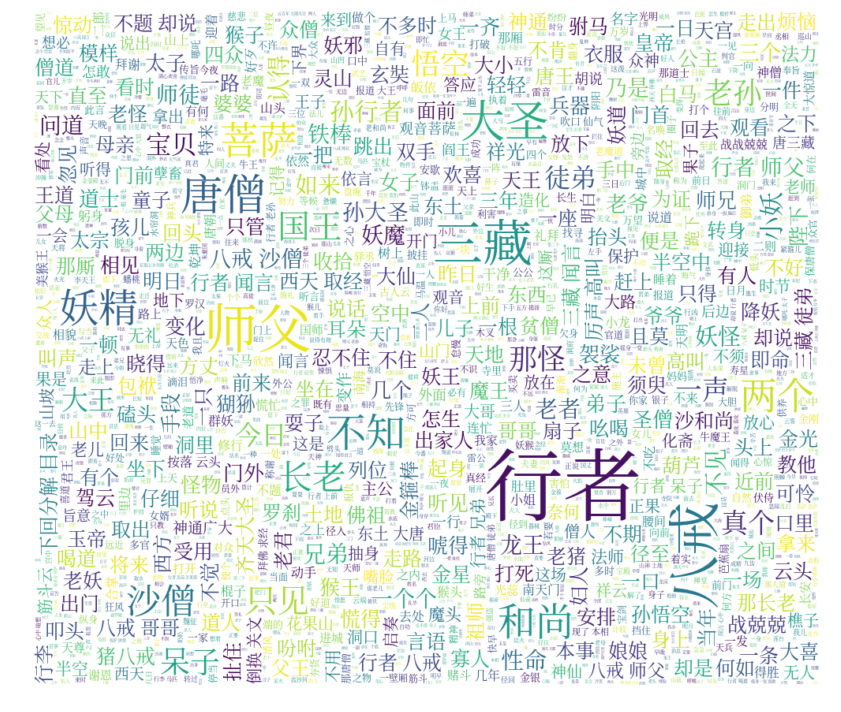

In [9]:
# display wordcloud
# interpolation="bilinear" to make the displayed image appear more smoothly
plt.figure(figsize=(16,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()

In [10]:
# save wordcloud as PNG image
wc.to_file("wordcloud.png")

---
# <a name="conclusion">Discussion and Conclusion</a>
In this project, we have performed NLP on the "Journey to the West" i.e. <<西游记>> novel. In particular, we have segmented the Chinese words, cleaned the word segments by removing stopwords (words which occur frequently but do not contain important significance and are therefore deemed irrelevant), counted the top 100 most frequently appeared word segments, and finally visualized the frequently appearing words in a wordcloud image. 

If you have any feedback for this project, feel free to contact me via my [LinkedIn](https://www.linkedin.com/in/limchiahooi) (https://www.linkedin.com/in/limchiahooi) or [GitHub Pages](https://limchiahooi.github.io) (https://limchiahooi.github.io).

---
### References
- Tutorials (in English)
    - https://amueller.github.io/word_cloud/auto_examples/wordcloud_cn.html
    - https://medium.com/fullstackwebdevelopers/word-cloud-jieba-generating-fancy-word-cloud-and-word-frequencies-report-858713109e5d

- Chinese Fonts (downloadable)
    - https://www.freechinesefont.com/simplified-source-han-serif-sc-download/
    - https://github.com/adobe-fonts/source-han-serif/tree/release/OTF/SimplifiedChinese
    - https://www.freechinesefont.com/traditional-source-han-serif-tc-download/
    - https://github.com/adobe-fonts/source-han-serif/tree/release/OTF/TraditionalChinese